<h1 style="text-align: center;">Partial Fraction Expansion</h1>
<p style="text-align: center;">Lab 6</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Use **scipy.signal.residue()** to perform partial fraction expansion. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Plot for the step response from the prelab for **Task 1**.  
[ ] Plot for the step response using **scipy.signal.step()** for **Task 2**.  
[ ] Printed output for the partial fraction expansion for **Task 3**
  
##### Part 2
[ ] Printed output for the partial fraction expansion for **Task 1**
[ ] Plot for the response using the **Cosine Method** for **Task 2**.  
[ ] Plot the response using **scipy.signal.step() for **Task 3**  

### 3. Part 1
##### 3.1 Purpose
To plot the step response of your prelab results and then use the **scipy.signal.residue()** function to perform partial fraction expansion on the S-domain system found in the prelab.  
##### 3.2 Tasks   
1. Plot the step response $y(t)$ that you found by hand in the prelab assignment from $0 \le t \le 2$ s.

In [58]:
# Insert all necessary imports here
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Insert your step function from previous labs here
def stepF(t):
    '''
    Step Function u(t)

    Input: t - time vector

    Output: Returns 1 for t >= 0, 0 for t < 0
    '''
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] >= 0:
            y[i] = 1
        else:
            y[i] = 0
    return y

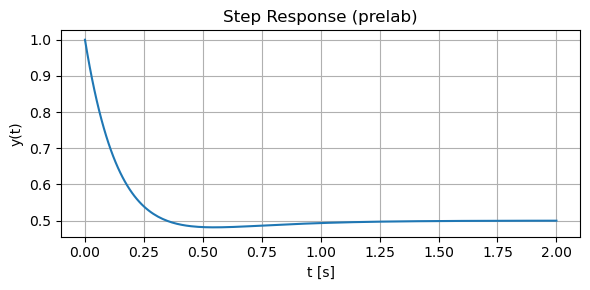

In [60]:
# Insert code creating your prelab response and plotting that response here

step = 1e-2
t = np.arange(0, 2 + step, step)

y = (0.5 - 0.5*np.exp(-4*t) + np.exp(-6*t))*stepF(t)

plt.figure(figsize=(6,3))
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Step Response (prelab)")
plt.tight_layout()
plt.show()

2. Using the $H(s)$ that you found in the prelab, plot the step response using the **scipy.signal.step()** command. *Note: The plots from Tasks 1 and 2 should be identical.* 

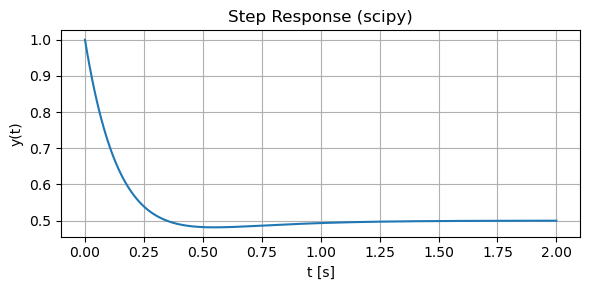

In [61]:
# Insert code creating and plotting the step response using scipy.signal.step() here
step = 1e-2
t = np.arange(0, 2 + step, step)

num = [1,6,12]
den = [1,10,24]

tout, yout = sig.step((num, den), T = t)

plt.figure(figsize=(6,3))
plt.plot(tout, yout)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Step Response (scipy)")
plt.tight_layout()
plt.show()

3. Entering $Y(s)$ (i.e. $Y(s) = H(s)X(s)$) from the prelab into **scipy.signal.residue()**, print the partial fraction expansion results R, P, and K. Compare this expression with the partial fraction expansion results derived by hand in the prelab and check that they agree. *Note: You can look up how to use the **scipy.signal.residue()** function in the scipy.signal documentation. The den array used in the **scipy.signal.residue()** function will **not** be the same as the one used in the **scipy.signal.step()** function in Task 2.*

In [62]:
# Insert code using scipy.signal.residue() to find the partial fraction terms and print R, P, K.
num = np.array([1, 6, 12])
den = np.array([1, 10, 24, 0])

r, p, k = sig.residue(num, den)
orig_r, orig_p, orig_k = [0.5, -0.5, 1], [0,-4, -6], []

print("Scipy Residues (R):", r)
print("Pre-lab Residues (R):", orig_r)
print("Scipy Poles (P):", p)
print("Pre-LabPoles (P):", orig_p)
print("Scipy Coefficients (K):", k)
print("Pre-lab Coefficients (K):", orig_k)

Scipy Residues (R): [ 0.5 -0.5  1. ]
Pre-lab Residues (R): [0.5, -0.5, 1]
Scipy Poles (P): [ 0. -4. -6.]
Pre-LabPoles (P): [0, -4, -6]
Scipy Coefficients (K): []
Pre-lab Coefficients (K): []


### 4. Part 2
##### 4.1 Purpose
Use **scipy.signal.residue()** to perform partial fraction expansion on a function that would be difficult to analyze by hand.
##### 4.2 Tasks   
A system is described by: $$y^{(5)}(t) + 18y^{(4)}(t) + 218y^{(3)}(t) + 2036y^{(2)}(t) + 9085y^{(1)}(t) + 25250y(t) = 25250x(t)$$  
1. For the system described above, use **scipy.signal.residue()** to find the partial fraction expansion of the step response and print the results R, P, and K.

In [63]:
# Insert code using scipy.signal.residue() to find the partial fraction terms and print R, P, K.
num = np.array([25250])
dem = np.array([1, 18, 218, 2036, 9085, 25250, 0])

r, p, k = sig.residue(num, dem)
#residues and poles printed using loop for clarity
print("Residues (R):")
for i in range(len(r)):
    print(f"{r[i]:.5f}")
print("Poles (P):")
for i in range(len(p)):
    print(f"{p[i]:.5f}")
print("Coefficients (K):", k)

Residues (R):
1.00000+0.00000j
-0.48558+0.72837j
-0.48558-0.72837j
-0.21462+0.00000j
0.09289-0.04765j
0.09289+0.04765j
Poles (P):
0.00000+0.00000j
-3.00000+4.00000j
-3.00000-4.00000j
-10.00000+0.00000j
-1.00000+10.00000j
-1.00000-10.00000j
Coefficients (K): []


2. Using the results from **Part 2, Task 1**, plot the time-domain response from $0 \le t \le 4.5$s using the cosine method. *Note: in Dr. Sullivan's notes, k is the residue of a given term. Also, the factor of 2 accounts for both terms in a complex conjugate pair.*

In [64]:
# Insert your cosine method as a function here
def cosine_method(r, p, t):
    """
    Uses the cosine method to find the step response.
    
    Inputs: r - residue array_like
            p - pole array_like
            t - time vector
            
    Outputs: y - step response calculated using the cosine method
    """  
    y = np.zeros(t.shape)
    
    for i in range(len(p)):
            alpha = np.real(p[i])
            omega = np.imag(p[i])
            
            k_mag = np.abs(r[i])
            k_arg = np.angle(r[i])

            y += k_mag * np.exp(alpha * t) * np.cos(omega * t + k_arg) * stepF(t)
              
    return y 

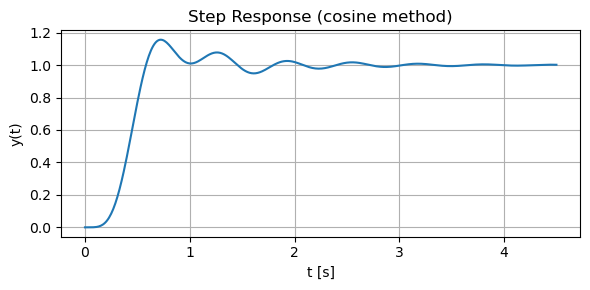

In [65]:
# Insert code calling the cosine method and plotting the response here
step = 1e-2
t = np.arange(0, 4.5 + step, step)

y = cosine_method(r, p, t)

plt.figure(figsize=(6,3))
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Step Response (cosine method)")
plt.tight_layout()
plt.show()

3. Using $H(s)$ from **Part 2, Task 1**, check your response from **Part 2, Task 2** using **scipy.signal.step()** and plot the results. *Note: Again, the den array used in **scipy.signal.step()** will **not** be the same as the one used in **scipy.signal.residue()** in **Part 2, Task 1**.*

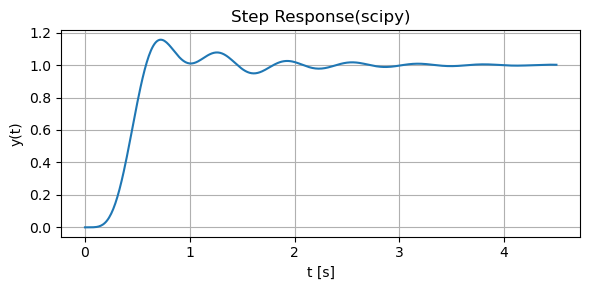

In [66]:
# Insert code creating and plotting the step response using scipy.signal.step() here
step = 1e-2
t = np.arange(0, 4.5 + step, step)

num = np.array([25250])
dem = np.array([1, 18, 218, 2036, 9085, 25250])

tout, yout = sig.step((num, dem), T = t)

plt.figure(figsize=(6,3))
plt.plot(tout, yout)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Step Response(scipy)")
plt.tight_layout()
plt.show()

### 5. Questions
1. For a non-complex pole-residue term, you can still use the cosine method, explain why this works.  
>The cosine method is still applicable for non-complex pole-residue terms because for non-complex terms, the imaginary component is $j0$. For the cosine term, this means $\omega$ and $\angle k$ lead to $cos(0) = 0$. For the $|k|$ component, the $j0$ value leads to $|k| = \sqrt{\Re(k)^2 +  \Im(k)^2} = \sqrt{\Re(k)^2 +  0} = k$. As a result, this reduces the expression for the non-complex component to $y(t) = k e^{\alpha t} u(t)$, which is the appropriate expression for non-complex terms.
2. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>